# Unsupervised Analysis of Fremont Bridge Data
## Codealong from Jake Vanderplas Youtube video

<pre>Must use Python 3 because of the urllib package only available in Python 3
Treating bridge crossings for each day as features to understand relationships between various days.
</pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from jupyterworkflow.data import get_fremont_data
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

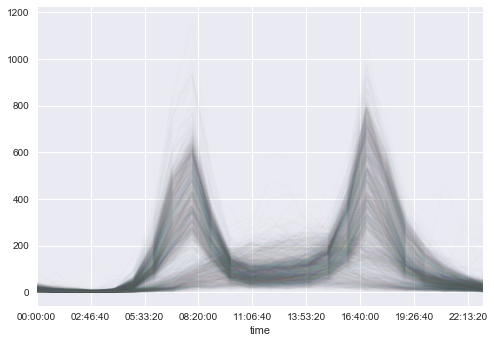

In [2]:
data = get_fremont_data()

pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [3]:
np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)

In [4]:
pivoted.shape

(24, 1794)

In [5]:
# if we transpose it, the days become observations and hours become columns
pivoted.T.shape

(1794, 24)

## Principal Component Analysis

In [6]:
X = pivoted.fillna(0).T.values
X.shape

(1794, 24)

In [7]:
PCA(2).fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# transforming X into 2 dimensions (features) using PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [9]:
X2.shape

(1794, 2)

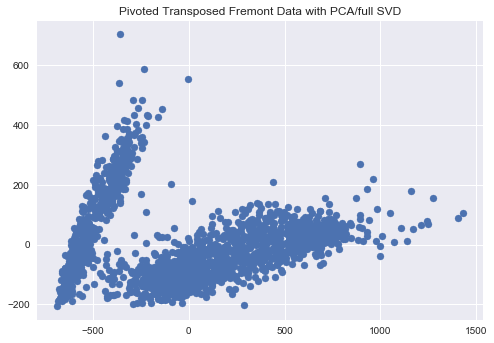

In [10]:
plt.scatter(X2[:, 0], X2[:,1])
plt.title('Pivoted Transposed Fremont Data with PCA/full SVD')

In [11]:
# 2 clusters
# use guassian mixture to classify each observation into 2 groups

In [12]:
# what would it look like if we did with 'auto' svd_solver?

In [13]:
X2_auto = PCA(2).fit_transform(X)
X2_auto.shape

(1794, 2)

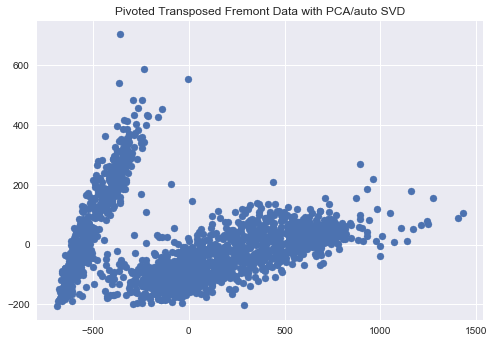

In [14]:
plt.scatter(X2_auto[:, 0], X2_auto[:,1])
plt.title('Pivoted Transposed Fremont Data with PCA/auto SVD')

# looks to be no difference.

## Unsupervised Clustering - Gaussian Mixture

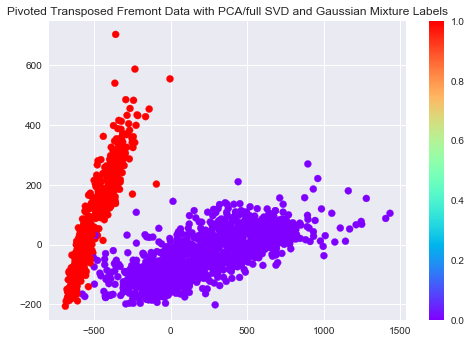

In [15]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

plt.scatter(X2[:, 0], X2[:,1], c=labels, cmap='rainbow')
plt.title('Pivoted Transposed Fremont Data with PCA/full SVD and Gaussian Mixture Labels')
plt.colorbar();

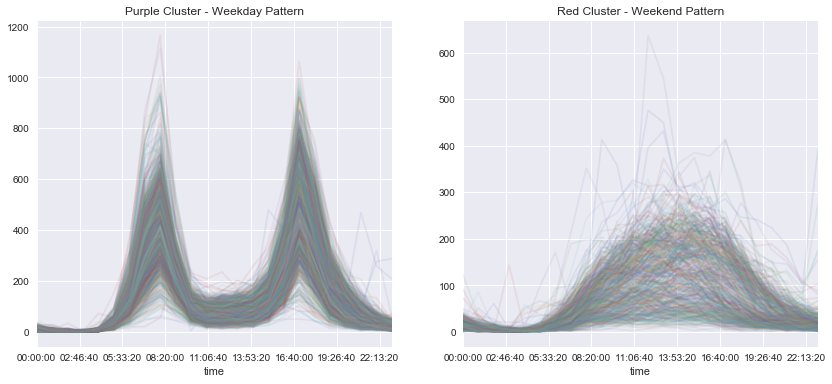

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster - Weekday Pattern')
ax[1].set_title('Red Cluster - Weekend Pattern')

## Comparing with Day of Week
### Looking at clusters with labels as day of the week

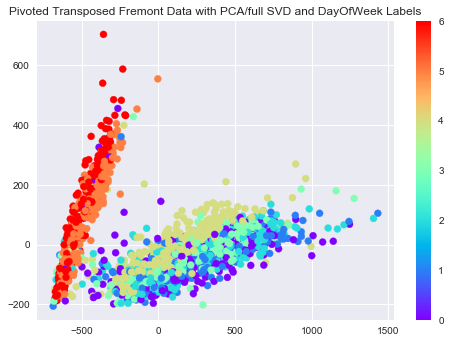

In [17]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(X2[:, 0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.title('Pivoted Transposed Fremont Data with PCA/full SVD and DayOfWeek Labels')
plt.colorbar();

## Analyzing Outliers

In [18]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek<5)]

# cluster [1] with weekday labels

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04'],
              dtype='datetime64[ns]', freq=None)

In [19]:
# look up date 2017-02-06 reason why this weekday shows up in the 'weekend' cluster
# This has shown to be the snow day, one of the worst weathers in Seattle.
# All other dates are related to holidays

Thank you Jake Vanderplas for this wonderful tutorial!

In [20]:
# checking versions
# import sklearn
# sklearn.__version__